<a href="https://colab.research.google.com/github/aymenhmid/NLP_Guide/blob/main/TensorFlow/Tensorflow_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Cheat Sheet

## Core Concepts

### Tensors
- **tf.constant(value)**: Creates a constant tensor
- **tf.Variable(value)**: Creates a variable tensor that can be modified
- **tf.convert_to_tensor(value)**: Converts Python objects to tensors
- **tf.cast(tensor, dtype)**: Casts a tensor to a new type

### Tensor Operations
- **tf.add(x, y)**, **x + y**: Element-wise addition
- **tf.subtract(x, y)**, **x - y**: Element-wise subtraction
- **tf.multiply(x, y)**, **x * y**: Element-wise multiplication
- **tf.divide(x, y)**, **x / y**: Element-wise division
- **tf.matmul(x, y)**, **x @ y**: Matrix multiplication
- **tf.reduce_mean(tensor)**: Compute mean across dimensions
- **tf.reduce_sum(tensor)**: Compute sum across dimensions
- **tf.transpose(tensor)**: Transpose a tensor

### Tensor Shapes
- **tensor.shape**: Get shape of tensor
- **tf.reshape(tensor, shape)**: Reshape tensor
- **tf.squeeze(tensor)**: Remove dimensions of size 1
- **tf.expand_dims(tensor, axis)**: Add a dimension
- **tf.concat([tensor1, tensor2], axis)**: Concatenate tensors
- **tf.stack([tensor1, tensor2], axis)**: Stack tensors

### Data Handling
- **tf.data.Dataset.from_tensor_slices(data)**: Create dataset from tensors
- **dataset.batch(batch_size)**: Create batches from dataset
- **dataset.shuffle(buffer_size)**: Shuffle dataset
- **dataset.repeat(count)**: Repeat dataset
- **dataset.prefetch(buffer_size)**: Prefetch data for performance

## Neural Networks

### Layers
- **tf.keras.layers.Dense(units, activation)**: Fully connected layer
- **tf.keras.layers.Conv2D(filters, kernel_size, strides, padding)**: 2D convolution
- **tf.keras.layers.MaxPool2D(pool_size, strides, padding)**: Max pooling
- **tf.keras.layers.Flatten()**: Flatten input
- **tf.keras.layers.Dropout(rate)**: Dropout for regularization
- **tf.keras.layers.BatchNormalization()**: Batch normalization
- **tf.keras.layers.LSTM(units)**: Long Short-Term Memory layer
- **tf.keras.layers.Embedding(input_dim, output_dim)**: Embedding layer

### Models
- **tf.keras.Sequential([layers])**: Sequential model
- **tf.keras.Model(inputs, outputs)**: Functional API model
- **model.compile(optimizer, loss, metrics)**: Configure model for training
- **model.fit(x, y, epochs, batch_size)**: Train model
- **model.evaluate(x, y)**: Evaluate model
- **model.predict(x)**: Generate predictions
- **model.summary()**: Print model summary
- **model.save(path)**, **tf.keras.models.save_model(model, path)**: Save model
- **tf.keras.models.load_model(path)**: Load saved model

### Loss Functions
- **tf.keras.losses.BinaryCrossentropy()**: Binary classification loss
- **tf.keras.losses.CategoricalCrossentropy()**: Multi-class classification loss
- **tf.keras.losses.SparseCategoricalCrossentropy()**: Multi-class with integer labels
- **tf.keras.losses.MeanSquaredError()**: Regression loss

### Optimizers
- **tf.keras.optimizers.Adam(learning_rate)**: Adam optimizer
- **tf.keras.optimizers.SGD(learning_rate)**: Stochastic gradient descent
- **tf.keras.optimizers.RMSprop(learning_rate)**: RMSprop optimizer

### Activations
- **tf.nn.relu(tensor)**: ReLU activation
- **tf.nn.sigmoid(tensor)**: Sigmoid activation
- **tf.nn.softmax(tensor)**: Softmax activation
- **tf.nn.tanh(tensor)**: Tanh activation

### Regularization
- **tf.keras.regularizers.l1(l)**: L1 regularization
- **tf.keras.regularizers.l2(l)**: L2 regularization
- **tf.keras.regularizers.l1_l2(l1, l2)**: L1 and L2 regularization

## Custom Training

### Gradients
- **with tf.GradientTape() as tape:** Context for auto differentiation
- **tape.gradient(target, sources)**: Compute gradients
- **optimizer.apply_gradients(zip(grads, vars))**: Apply gradients

### Metrics
- **tf.keras.metrics.Accuracy()**: Accuracy metric
- **tf.keras.metrics.Precision()**: Precision metric
- **tf.keras.metrics.Recall()**: Recall metric
- **metric.update_state(y_true, y_pred)**: Update metric state
- **metric.result()**: Get current result
- **metric.reset_states()**: Reset metric state

## Callbacks
- **tf.keras.callbacks.ModelCheckpoint(filepath)**: Save checkpoints
- **tf.keras.callbacks.EarlyStopping(monitor, patience)**: Stop training early
- **tf.keras.callbacks.TensorBoard(log_dir)**: TensorBoard visualization
- **tf.keras.callbacks.ReduceLROnPlateau(monitor, factor)**: Learning rate scheduling

## Saving & Loading
- **tf.saved_model.save(model, path)**: Save a SavedModel
- **tf.saved_model.load(path)**: Load a SavedModel
- **tf.io.write_file(filename, contents)**: Write to file
- **tf.io.read_file(filename)**: Read from file

## TensorFlow Hub
- **hub_layer = hub.KerasLayer(handle)**: Load pre-trained models
- **model = tf.keras.Sequential([hub_layer, ...])**: Use in models

## Implementation Example: MNIST Classification:

In [7]:
# MNIST Classification with TensorFlow

## 1. Setup and Data Loading

import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


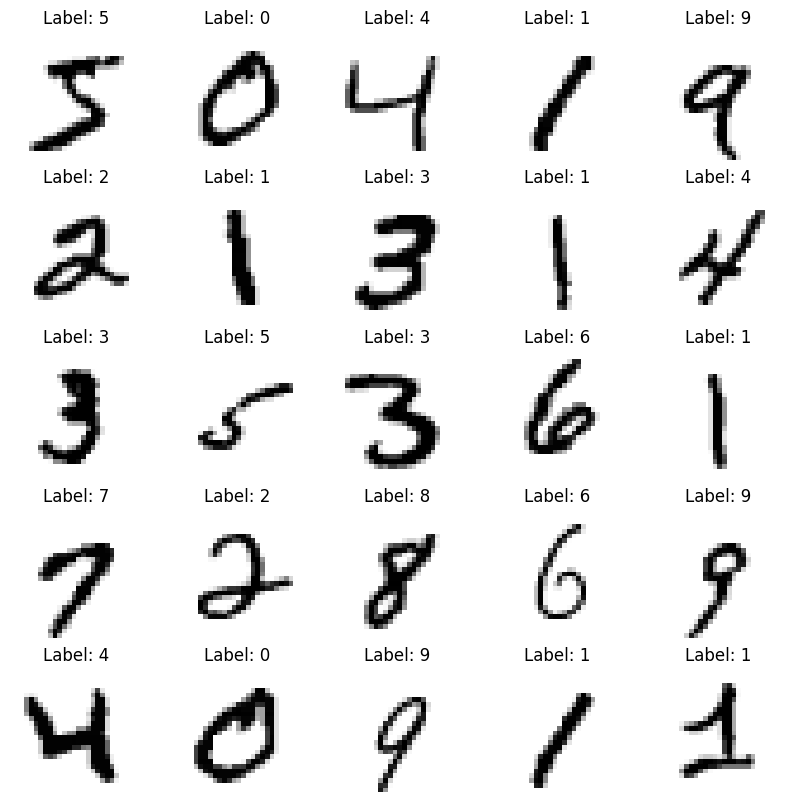

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 784D vector
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 units
    tf.keras.layers.Dropout(0.2),                    # Regularization
    tf.keras.layers.Dense(10)                        # Output layer with 10 units (0-9)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8428 - loss: 0.5338 - val_accuracy: 0.9517 - val_loss: 0.1657
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9513 - loss: 0.1662 - val_accuracy: 0.9663 - val_loss: 0.1156
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9639 - loss: 0.1213 - val_accuracy: 0.9697 - val_loss: 0.1014
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9705 - loss: 0.0959 - val_accuracy: 0.9718 - val_loss: 0.0934
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9771 - loss: 0.0777 - val_accuracy: 0.9746 - val_loss: 0.0845
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9797 - loss: 0.0662 - val_accuracy: 0.9760 - val_loss: 0.0773
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0537 

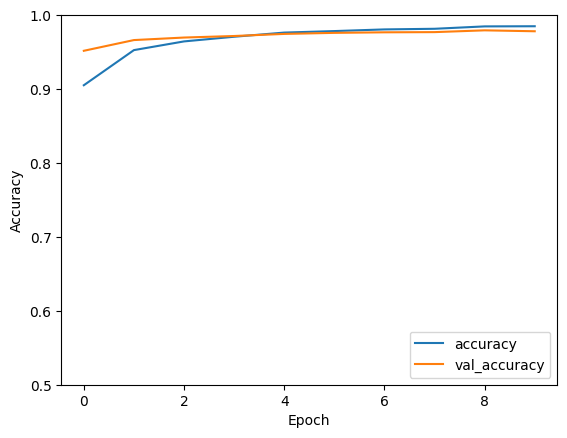

313/313 - 1s - 2ms/step - accuracy: 0.9799 - loss: 0.0712

Test accuracy: 97.99%


In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


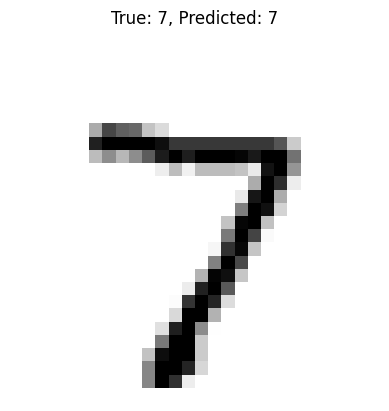

In [12]:
# Add softmax layer for probability output
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Predict on test samples
predictions = probability_model.predict(x_test)

# Show sample prediction
sample_index = 0
plt.imshow(x_test[sample_index], cmap=plt.cm.binary)
plt.title(f"True: {y_test[sample_index]}, Predicted: {tf.argmax(predictions[sample_index]).numpy()}")
plt.axis('off')
plt.show()

In [13]:
# Save model
model.save('mnist_model.keras')

# Load model
loaded_model = tf.keras.models.load_model('mnist_model.keras')